# Create table (All articles, Total number of clusters, Total number of clusters with more than one article, Clusters with one article, Avg. size of a cluster)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import collections
import scipy.stats as stats
import pylab as pl
import statistics
from numpy import *
from collections import Counter

In [2]:
df_analysis = pd.DataFrame(columns=['Number of articles','Total number of clusters', 'Total number of clusters with more than one article','Total number of clusters with one article','Average size of a cluster with more than one article'])

In [3]:
def concept_analysis(dataframe):
    #Number of articles
    Number_of_articles = df.shape[0]
    
    #Total number of clusters
    Total_number_of_clusters = len(df.groupby("cluster_id"))
    
    #Total number of clusters with more than one article
    size = df.groupby("cluster_id").size()
    size = size[size > 1]
    Total_number_of_clusters_with_more_than_one_article = len(size)
    
    #Total number of clusters with one article
    size = df.groupby("cluster_id").size()
    size = size[size == 1]
    Total_number_of_clusters_with_one_article = len(size)
    
    #Average size of a cluster with more than one article
    size = df.groupby("cluster_id").size() 
    size = size[size > 1] 
    Avg_size_of_a_cluster = size.mean() #mean of clusters with more than one article
    
    
    #print("Number of articles:",Number_of_articles)
    #print("Total number of clusters:",Total_number_of_clusters)
    #print("Total number of clusters with more than one article:", Total_number_of_clusters_with_more_than_one_article)
    #print("Total number of clusters with one article:", Total_number_of_clusters_with_one_article)
    #print("Average size of a cluster with more than one article:", Avg_size_of_a_cluster)
    return [Number_of_articles, Total_number_of_clusters, Total_number_of_clusters_with_more_than_one_article, Total_number_of_clusters_with_one_article, Avg_size_of_a_cluster]

In [5]:
mypath = "../data/labeled"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file in tqdm(onlyfiles, desc="Article Feed"):
    #New concept file
    df = pd.read_csv(f"../data/labeled/{file}")
    
    #Creating row
    new_row = concept_analysis(df)
    
    #Concept/row name fomratting
    file = file.replace("_", " ")
    file = file.split(".csv")[0]
    
    #Adding row to the dataframe
    df_analysis.loc[f"{file}"] = new_row

Article Feed: 100%|████████████████████████████████████████████████████████████████████████████████████| 28/28 [01:27<00:00,  3.13s/it]


In [6]:
#Formatting numbers in dataframe
pd.options.display.float_format = '{:,.5f}'.format
df_analysis = df_analysis.apply(lambda x: x.astype(int) if np.allclose(x, x.astype(int)) else x)

In [7]:
df_analysis

,Number of articles,Total number of clusters,Total number of clusters with more than one article,Total number of clusters with one article,Average size of a cluster with more than one article
presidency of the council of the european union,44560,12492,4977,7515,7.44324
association football UEFA europa league,109285,17468,8897,8571,11.32000
olympic games japan table tennis,1781,309,172,137,9.55814
olympic games japan rowing,5012,639,355,284,13.31831
association football uefa european championship,4594,1347,511,836,7.35421
olympic games japan basketball,10180,1281,706,575,13.60482
paralympic games japan basketball,463,120,53,67,7.47170
european migrant crisis,81186,21419,7647,13772,8.81574
association football la liga,292388,31282,15838,15444,17.48605
olympic games japan skateboarding,6526,489,276,213,22.87319


In [8]:
df_analysis.to_csv("../data/analysis_table.csv", encoding='utf-8', index=True)

# Language distribution (graphs)

## ON ALL articles AND ON EVERY concept

In [6]:
df = pd.read_csv("../data/labeled/basketball_nba.csv")

In [7]:
df

,Unnamed: 0,title,body,concept,time,lang,eventUri,cluster_id
0,0,Hot Button: Dorsey out as Browns GM ... Rhule ...,"ROCHESTER, N.Y. -- Hot Button is a 'round-the-...","['basketball', 'nba']",2020-01-01 01:02:00,eng,eng-5388538,0
1,1,LeBron James es elegido el mejor deportista de...,El actual alero de los Lakers derrotó en las v...,"['basketball', 'nba']",2020-01-01 01:02:00,spa,NaN,1
2,2,NBA - LeBron James et les Lakers gagnent encor...,"NBA - Auteur d'une triple-double (32 pts, 13 r...","['basketball', 'nba']",2020-01-02 07:57:00,fra,deu-1127446,1
3,3,"Milwaukeeju 31. zmaga v sezoni, LeBronu Jamesu...","Los Angeles, 02. januarja (STA) - V novo leto ...","['basketball', 'nba']",2020-01-02 08:53:00,slv,NaN,1
4,4,NBA. Les Los Angeles Lakers et Milwaukee début...,Les leaders au rendez-vous de la nouvelle anné...,"['basketball', 'nba']",2020-01-02 10:47:00,fra,deu-1127446,1
...,...,...,...,...,...,...,...,...
267630,267630,"Giannis shows off Portis, DiVincenzo basketbal...",The Greek Freak is in the first year of a five...,"['basketball', 'nba']",2021-11-30 00:05:00,eng,eng-7307315,77792
267631,267631,NBA: Code of conduct violation led to ejection...,INDIANAPOLIS (WISH) -- The NBA confirmed Monda...,"['basketball', 'nba']",2021-11-30 00:28:00,eng,NaN,77793
267632,267632,NBA : les absences d'OG Anunoby et Khem Birch ...,TORONTO - Les absences d'OG Anunoby et Khem Bi...,"['basketball', 'nba']",2021-11-30 00:36:00,fra,fra-800187,77794
267633,267633,John Collins is playing the best basketball of...,John Collins feels like he can sometimes be co...,"['basketball', 'nba']",2021-11-30 00:40:00,eng,eng-7299797,77795


## On articles

In [23]:
def Language_distribution(df):
    x = df.groupby("lang").size()
    
    x = list(zip(x.index,x))
    
    
    #To make sure that we have all languages also when 0 articles are in the concept with this language
    languages = {'eng': 0,
                 'spa': 0,
                 'zho': 0,
                 'rus': 0,
                 'fra': 0,
                 'por': 0,
                 'slv': 0,
                 'deu': 0,
                 'jpn': 0,
                 'ara': 0}
    
    for lang in x:
        languages[lang[0]] = lang[1]
        
    x = list(languages.items())
    #Sorting by the number of language occurence
    #x = sorted(x, key=lambda x: x[1], reverse=True)
    #print(x)

    indices = np.arange(len(x))
    word, frequency = zip(*x)
    plt.bar(indices, frequency, color='r')
    plt.xticks(indices, word, rotation='vertical')
    plt.gca().set_yscale('log')
    plt.tight_layout()
    plt.gca().set(ylabel='Number of Articles', xlabel='Languages')
    plt.title('Language Distribution', fontdict=dict(size=22))
    plt.show()

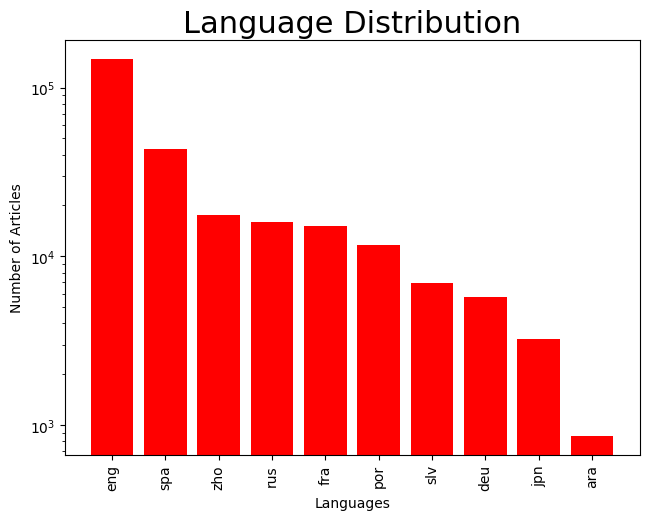

In [24]:
Language_distribution(df)

## On clusters

In [339]:
size = df.groupby("cluster_id").size() #groups by cluster_id and returns the size of each group
size = size[size > 1] #selects only groups with size more than 1
#print(size)
#print(size.index.tolist())
lst_of_index = size.index.tolist()
df_size = df[df['cluster_id'].isin(lst_of_index)]  # creates a dataframe with only indexes of groups with predefined size
#df_size = df.iloc[size.index]

In [340]:
#Creates a list of numbers where each number represents the amount of different languages in a specific cluster
lst = []
for group in df_size.groupby("cluster_id"):
    freq = collections.defaultdict(int)
    #print(lst)
    #print(group)
    for x in group[1].lang.tolist():
        freq[x] += 1
    lst.append(len(freq))

In [341]:
#Count occurences for every number
from collections import Counter
def get_tuple_count_list(_list):
    #countedDict = Counter(_list)
    #for key, value in countedDict.items():
    #    countedDict[key] = value/len(df.groupby("cluster_id"))
    #print(countedDict)
    return Counter(_list).most_common()
lst = get_tuple_count_list(lst)
lst

[(1, 27621),
 (2, 4958),
 (3, 1522),
 (4, 619),
 (5, 333),
 (6, 86),
 (7, 15),
 (8, 2)]

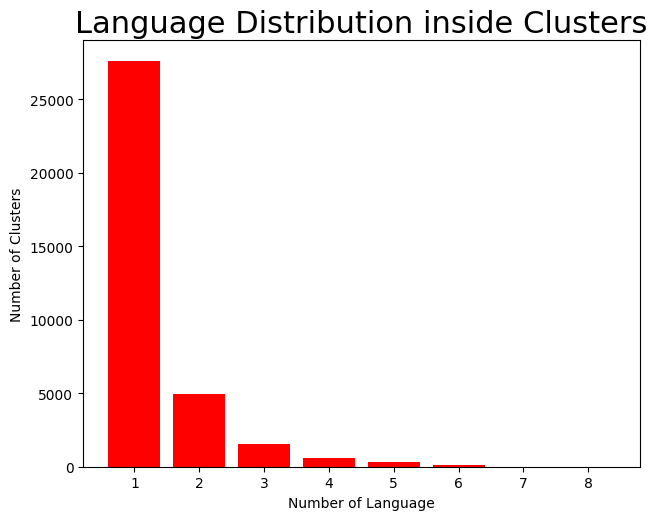

In [342]:
x = lst
indices = np.arange(len(x))
word, frequency = zip(*x)
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word)
plt.tight_layout()
plt.gca().set(ylabel='Number of Clusters', xlabel='Number of Language')
plt.title('Language Distribution inside Clusters', fontdict=dict(size=22))
plt.show()

# Cluster size distribution

In [359]:
df = pd.read_csv("../data/labeled/basketball_nba.csv")

In [360]:
df

,Unnamed: 0,title,body,concept,time,lang,eventUri,cluster_id
0,0,Hot Button: Dorsey out as Browns GM ... Rhule ...,"ROCHESTER, N.Y. -- Hot Button is a 'round-the-...","['basketball', 'nba']",2020-01-01 01:02:00,eng,eng-5388538,0
1,1,LeBron James es elegido el mejor deportista de...,El actual alero de los Lakers derrotó en las v...,"['basketball', 'nba']",2020-01-01 01:02:00,spa,NaN,1
2,2,NBA - LeBron James et les Lakers gagnent encor...,"NBA - Auteur d'une triple-double (32 pts, 13 r...","['basketball', 'nba']",2020-01-02 07:57:00,fra,deu-1127446,1
3,3,"Milwaukeeju 31. zmaga v sezoni, LeBronu Jamesu...","Los Angeles, 02. januarja (STA) - V novo leto ...","['basketball', 'nba']",2020-01-02 08:53:00,slv,NaN,1
4,4,NBA. Les Los Angeles Lakers et Milwaukee début...,Les leaders au rendez-vous de la nouvelle anné...,"['basketball', 'nba']",2020-01-02 10:47:00,fra,deu-1127446,1
...,...,...,...,...,...,...,...,...
267630,267630,"Giannis shows off Portis, DiVincenzo basketbal...",The Greek Freak is in the first year of a five...,"['basketball', 'nba']",2021-11-30 00:05:00,eng,eng-7307315,77792
267631,267631,NBA: Code of conduct violation led to ejection...,INDIANAPOLIS (WISH) -- The NBA confirmed Monda...,"['basketball', 'nba']",2021-11-30 00:28:00,eng,NaN,77793
267632,267632,NBA : les absences d'OG Anunoby et Khem Birch ...,TORONTO - Les absences d'OG Anunoby et Khem Bi...,"['basketball', 'nba']",2021-11-30 00:36:00,fra,fra-800187,77794
267633,267633,John Collins is playing the best basketball of...,John Collins feels like he can sometimes be co...,"['basketball', 'nba']",2021-11-30 00:40:00,eng,eng-7299797,77795


In [361]:
x = df.groupby("cluster_id").size().tolist()

In [362]:
#Count occurences for every number
from collections import Counter
def get_tuple_count_list(_list):
    return Counter(_list).most_common()
x = get_tuple_count_list(x)
x = sorted(x, key=lambda x: x[0])

In [363]:
x = x[:20]

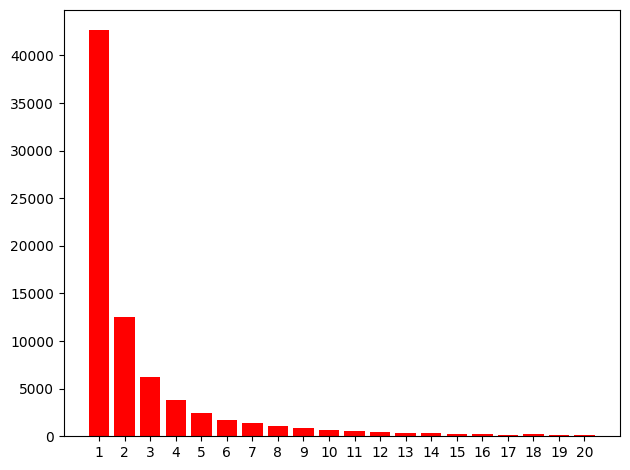

In [364]:
indices = np.arange(len(x))
word, frequency = zip(*x)
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word)
plt.tight_layout()
plt.show()

# Article length distribution (by character)

In [365]:
df = pd.read_csv("../data/labeled/basketball_nba.csv")

In [366]:
df

,Unnamed: 0,title,body,concept,time,lang,eventUri,cluster_id
0,0,Hot Button: Dorsey out as Browns GM ... Rhule ...,"ROCHESTER, N.Y. -- Hot Button is a 'round-the-...","['basketball', 'nba']",2020-01-01 01:02:00,eng,eng-5388538,0
1,1,LeBron James es elegido el mejor deportista de...,El actual alero de los Lakers derrotó en las v...,"['basketball', 'nba']",2020-01-01 01:02:00,spa,NaN,1
2,2,NBA - LeBron James et les Lakers gagnent encor...,"NBA - Auteur d'une triple-double (32 pts, 13 r...","['basketball', 'nba']",2020-01-02 07:57:00,fra,deu-1127446,1
3,3,"Milwaukeeju 31. zmaga v sezoni, LeBronu Jamesu...","Los Angeles, 02. januarja (STA) - V novo leto ...","['basketball', 'nba']",2020-01-02 08:53:00,slv,NaN,1
4,4,NBA. Les Los Angeles Lakers et Milwaukee début...,Les leaders au rendez-vous de la nouvelle anné...,"['basketball', 'nba']",2020-01-02 10:47:00,fra,deu-1127446,1
...,...,...,...,...,...,...,...,...
267630,267630,"Giannis shows off Portis, DiVincenzo basketbal...",The Greek Freak is in the first year of a five...,"['basketball', 'nba']",2021-11-30 00:05:00,eng,eng-7307315,77792
267631,267631,NBA: Code of conduct violation led to ejection...,INDIANAPOLIS (WISH) -- The NBA confirmed Monda...,"['basketball', 'nba']",2021-11-30 00:28:00,eng,NaN,77793
267632,267632,NBA : les absences d'OG Anunoby et Khem Birch ...,TORONTO - Les absences d'OG Anunoby et Khem Bi...,"['basketball', 'nba']",2021-11-30 00:36:00,fra,fra-800187,77794
267633,267633,John Collins is playing the best basketball of...,John Collins feels like he can sometimes be co...,"['basketball', 'nba']",2021-11-30 00:40:00,eng,eng-7299797,77795


In [367]:
x = df['body'].to_list()

In [368]:
lengths = []
for body in x:
    lengths.append(len(body))

In [369]:
h = sorted(lengths)

In [370]:
    def make_plot(data, max, step, step_plot):
        plt.figure(figsize=(16, 7), dpi=160)

        plt.hist(data, bins=np.arange(0, max, step))
        plt.xticks(np.arange(0, max, step_plot))

        #plt.text(750, 100, "Mean   : " + str(round(np.mean(data))))
        #plt.text(750, 90, "Median : " + str(round(np.median(data))))
        #plt.text(750, 80, "Stdev   : " + str(round(np.std(data))))
        #plt.text(750, 70, "1%ile    : " + str(round(np.quantile(data, q=0.01))))
        plt.text(750, 60, "99%ile  : " + str(round(np.quantile(data, q=0.99))))

        plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
        plt.title('Distribution of Document Character Counts', fontdict=dict(size=22))

        #outpath = os.path.join(self.outdir,
        #                       "{}_{}_distribution_words_in_documents.png".format(self.prefix, max))

        #plt.savefig(outpath)

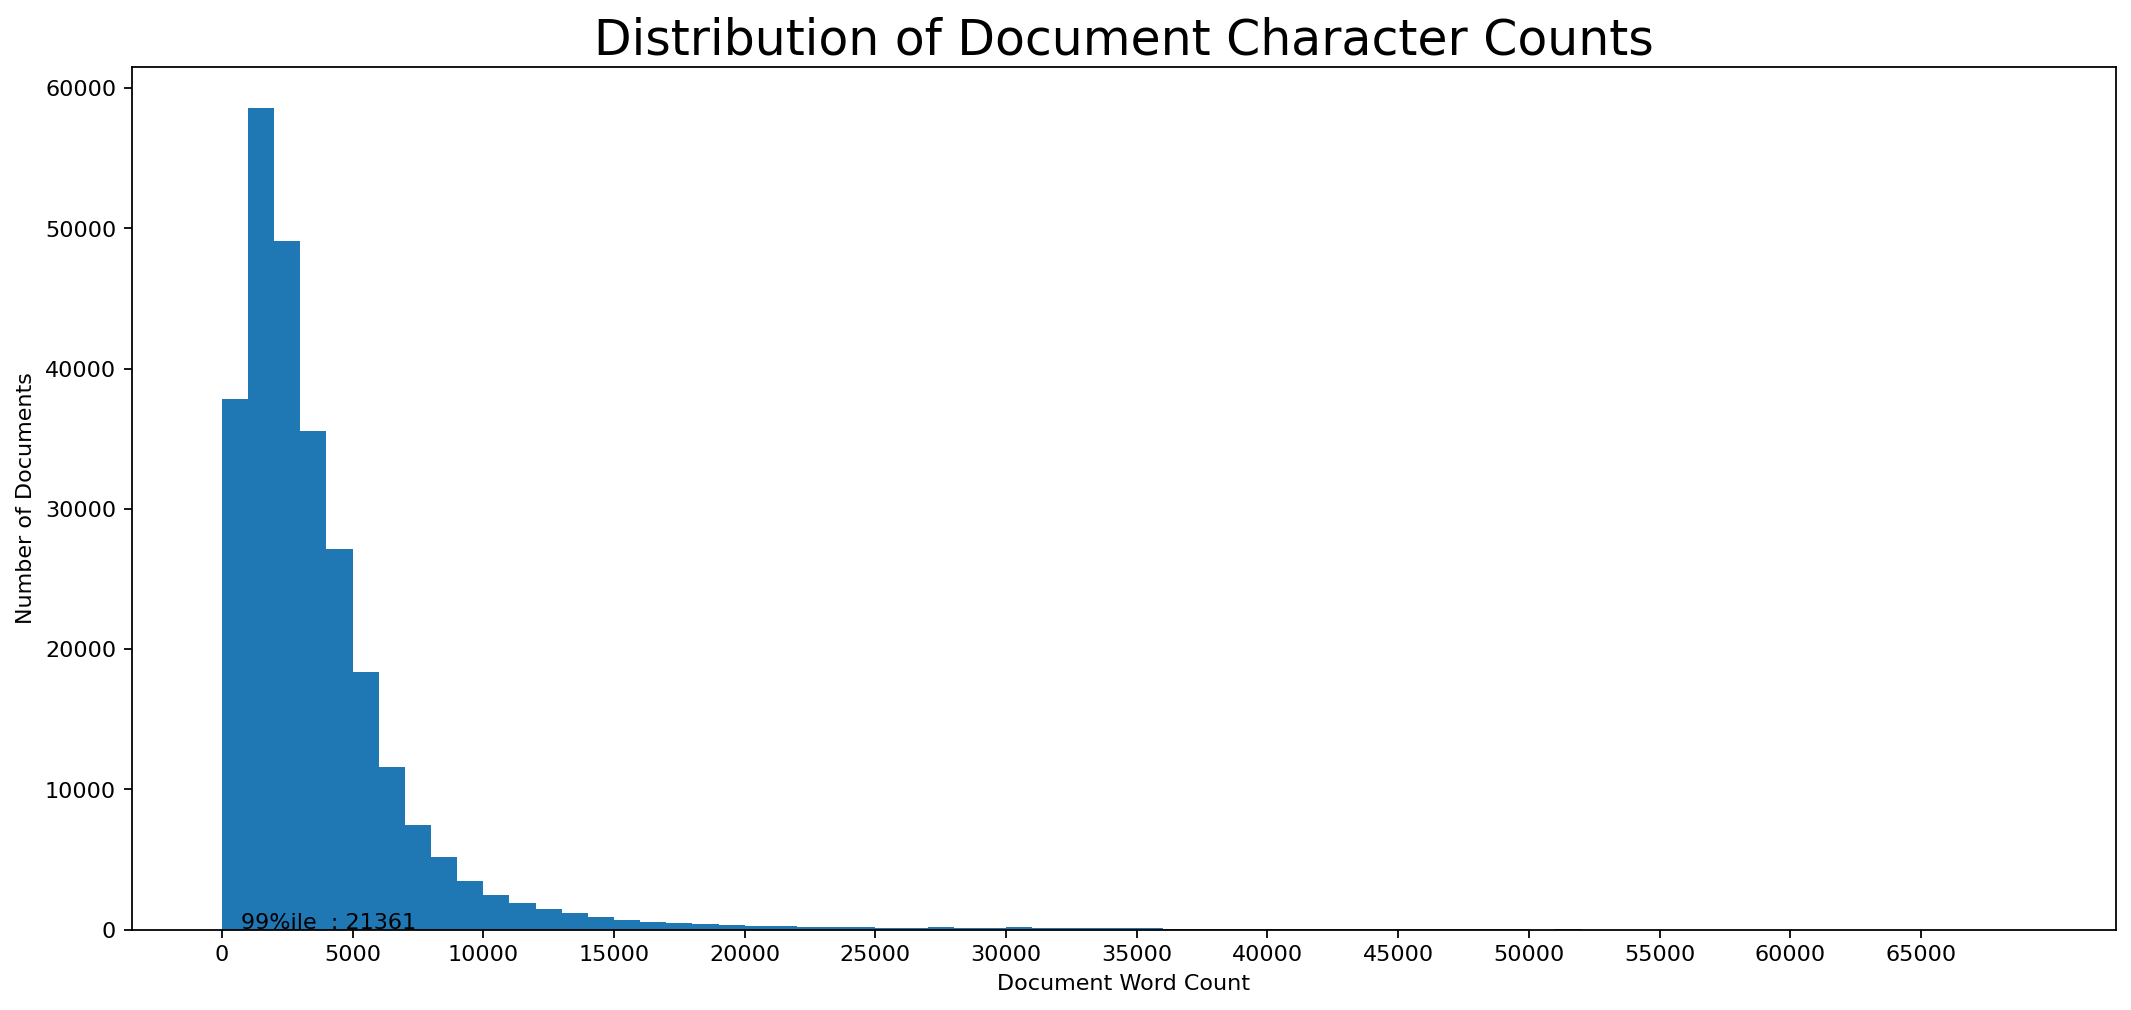

In [371]:
make_plot(h, 70000, 1000, 5000)

# Vesrsion 1 (language distribution)

In [357]:
def Language_distribution(df, file):
    x = df.groupby("lang").size()


    x = list(zip(x.index,x))

    languages = {'eng': 0,
                 'spa': 0,
                 'zho': 0,
                 'rus': 0,
                 'fra': 0,
                 'por': 0,
                 'slv': 0,
                 'deu': 0,
                 'jpn': 0,
                 'ara': 0}
    
    dflength = len(df)
    
    for lang in x:
        languages[lang[0]] = lang[1]/dflength
        
    x = list(languages.items())


    indices = np.arange(len(x))
    word, frequency = zip(*x)
    plt.bar(indices, frequency, color='r')
    plt.xticks(indices, word, rotation='vertical')
    plt.ylim([0,1])
    plt.title(file, fontdict=dict(size=5))
    return plt.tight_layout()
    #plt.gca().set(ylabel='Number of Articles', xlabel='Languages')
    #plt.title('Language Distribution', fontdict=dict(size=22))
    #plt.title(file, fontdict=dict(size=22))
    #plt.show()

Article Feed: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [01:44<00:00,  3.72s/it]


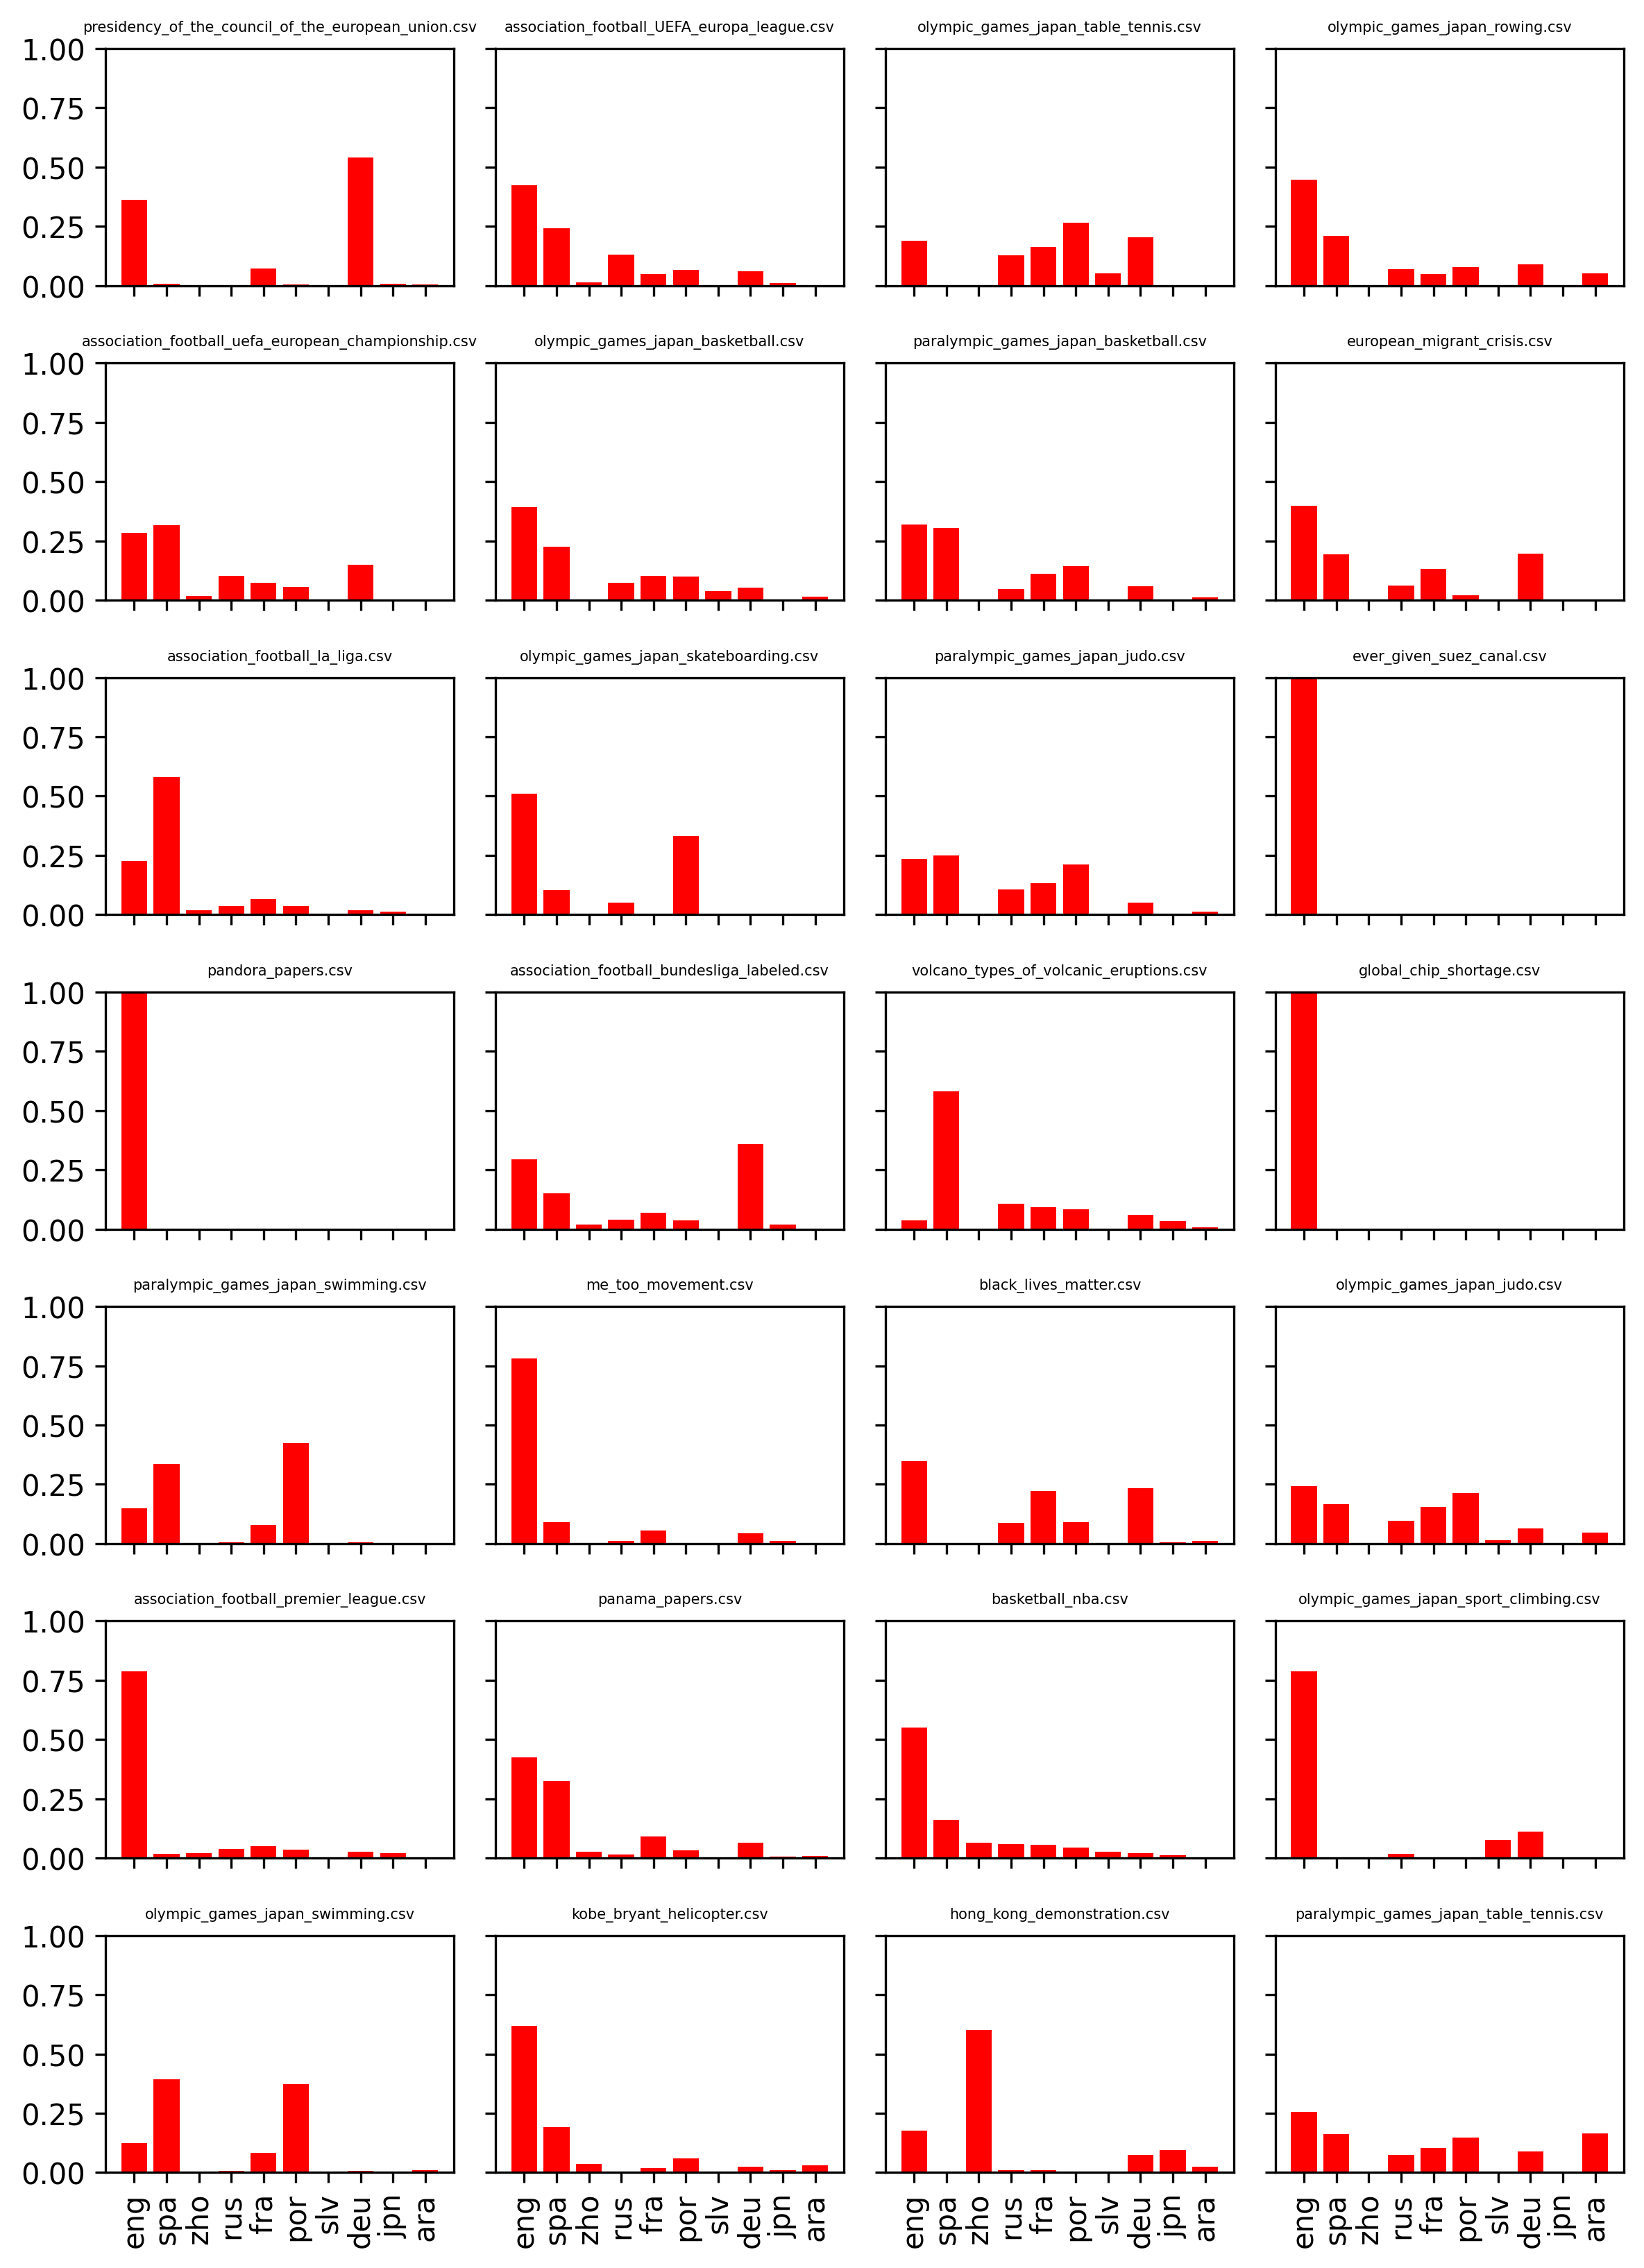

In [358]:
mypath = "../data/labeled"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Create a subplot grid with 7 rows and 4 columns
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(8, 11), dpi=300, sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.5)
#print(axs.shape)

position=0
for file in tqdm(onlyfiles, desc="Article Feed"):
    #New concept file
    df = pd.read_csv(f"../data/labeled/{file}")
    #print(int(i/4), i%4)
    #Plot the barplot
    plt.sca(axs[int(position/4), position%4])
    Language_distribution(df,file)
    position += 1

plt.savefig('28_barplots.png')
plt.show()

# Vesrsion 2

In [32]:
def Language_distribution(df, file):
    x = df.groupby("lang").size()


    x = list(zip(x.index,x))

    languages = {'eng': 0,
                 'spa': 0,
                 'zho': 0,
                 'rus': 0,
                 'fra': 0,
                 'por': 0,
                 'slv': 0,
                 'deu': 0,
                 'jpn': 0,
                 'ara': 0}
    
    for lang in x:
        languages[lang[0]] = lang[1]
        
    x = list(languages.items())


    indices = np.arange(len(x))
    word, frequency = zip(*x)
    plt.bar(indices, frequency, color='r')
    plt.gca().set_yscale('log')
    plt.xticks(indices, word, rotation='vertical')
    plt.title(file, fontdict=dict(size=6))
    return plt.tight_layout()
    #plt.gca().set(ylabel='Number of Articles', xlabel='Languages')
    #plt.title('Language Distribution', fontdict=dict(size=22))
    #plt.title(file, fontdict=dict(size=22))
    #plt.show()

Article Feed:   4%|█▋                                            | 1/28 [00:03<01:27,  3.25s/it]/tmp/ipykernel_936465/2928856375.py:30: UserWarning: The figure layout has changed to tight
  return plt.tight_layout()
Article Feed:   7%|███▎                                          | 2/28 [00:09<02:07,  4.92s/it]/tmp/ipykernel_936465/2928856375.py:30: UserWarning: The figure layout has changed to tight
  return plt.tight_layout()
Article Feed:  11%|████▉                                         | 3/28 [00:10<01:16,  3.05s/it]/tmp/ipykernel_936465/2928856375.py:30: UserWarning: The figure layout has changed to tight
  return plt.tight_layout()
Article Feed:  14%|██████▌                                       | 4/28 [00:11<00:52,  2.19s/it]/tmp/ipykernel_936465/2928856375.py:30: UserWarning: The figure layout has changed to tight
  return plt.tight_layout()
Article Feed:  18%|████████▏                                     | 5/28 [00:11<00:38,  1.67s/it]/tmp/ipykernel_936465/2928856375.py:30: 

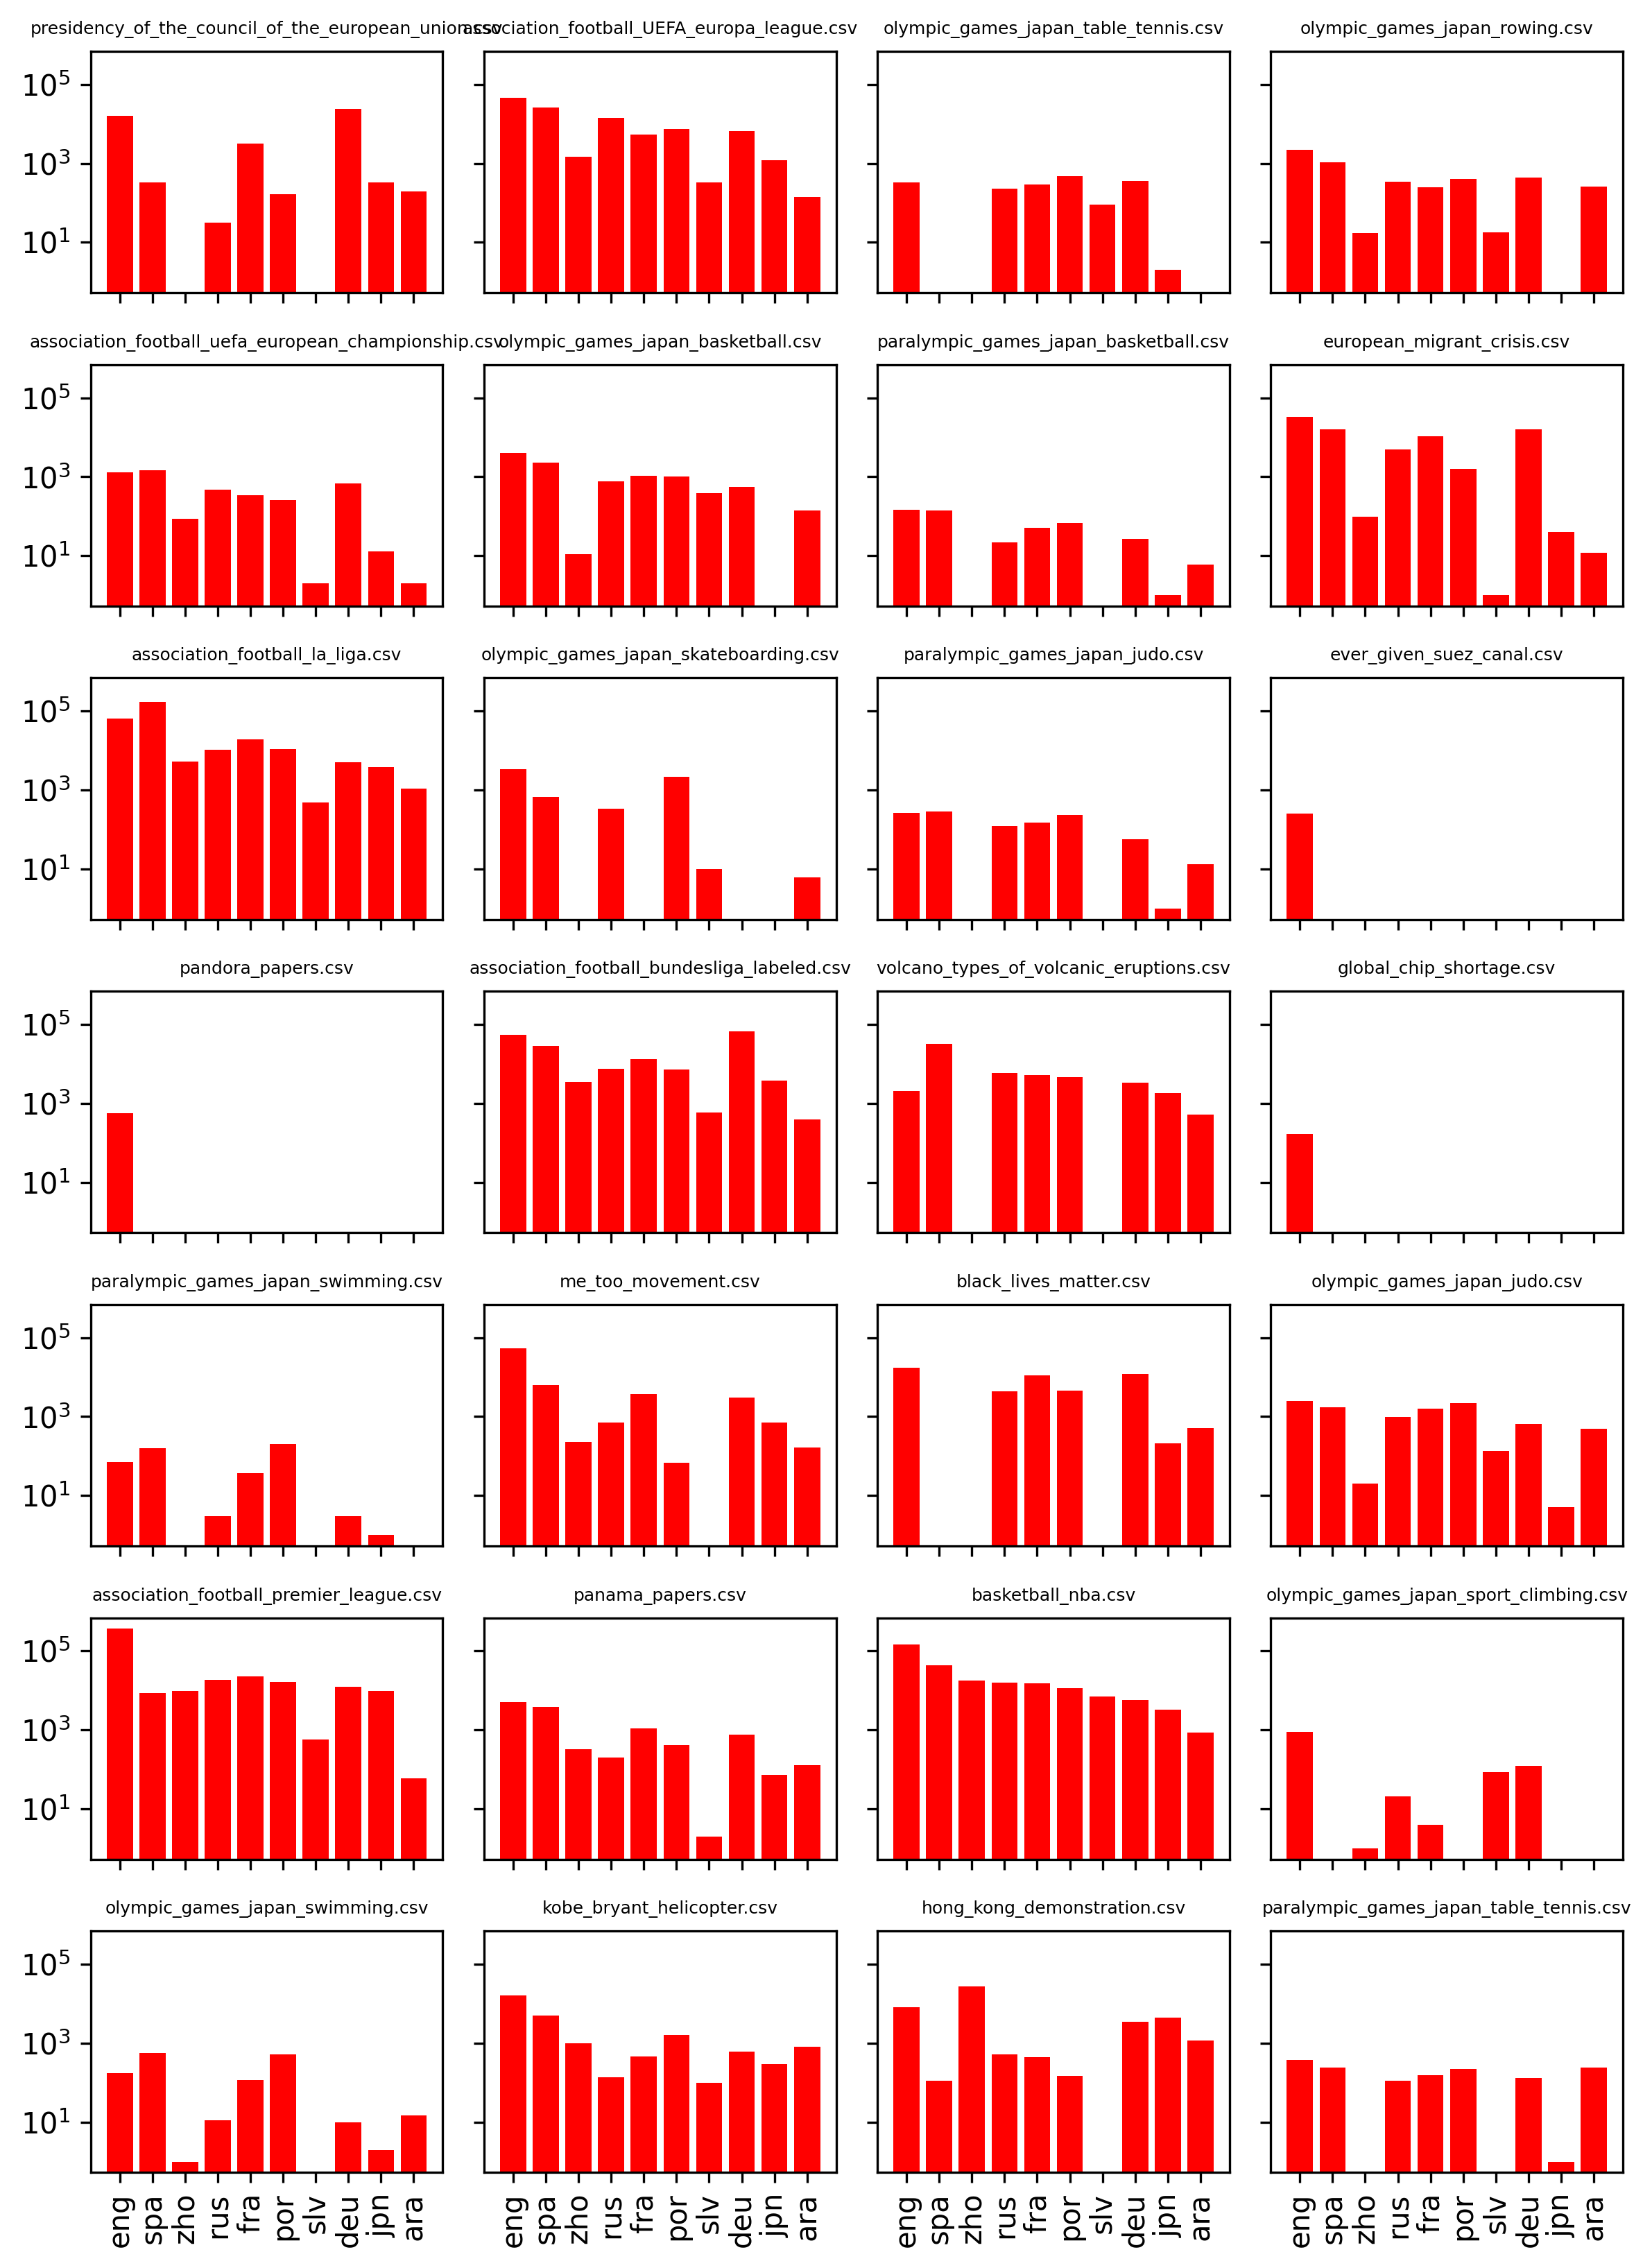

In [33]:
mypath = "../data/labeled"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Create a subplot grid with 7 rows and 4 columns
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(8, 11), dpi=300, sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.5)
#print(axs.shape)

position=0
for file in tqdm(onlyfiles, desc="Article Feed"):
    #New concept file
    df = pd.read_csv(f"../data/labeled/{file}")
    #print(int(i/4), i%4)
    #Plot the barplot
    plt.sca(axs[int(position/4), position%4])
    Language_distribution(df,file)
    position += 1

plt.savefig('28_barplots.png')
plt.show()

In [ ]:
mypath = "../data/labeled"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file in tqdm(onlyfiles, desc="Article Feed"):
    #New concept file
    df = pd.read_csv(f"../data/labeled/{file}")
    Language_distribution(df)

# Language distribution inside clusters

In [327]:
df = pd.read_csv("../data/labeled/association_football_UEFA_europa_league.csv")

In [334]:
size = df.groupby("cluster_id").size() #groups by cluster_id and returns the size of each group
size = size[size > 1] #selects only groups with size more than 1

lst_of_index = size.index.tolist()
df_size = df[df['cluster_id'].isin(lst_of_index)]  # creates a dataframe with only indexes of groups with predefined size

In [335]:
#Creates a list of numbers where each number represents the amount of different languages in a specific cluster
lst = []
for group in df_size.groupby("cluster_id"):
    freq = collections.defaultdict(int)

    for x in group[1].lang.tolist():
        freq[x] += 1
    lst.append(len(freq))

In [336]:
#Count occurences for every number
from collections import Counter
def get_tuple_count_list(_list):
    countedDict = Counter(_list)
    print(countedDict)
    for key, value in countedDict.items():
        countedDict[key] = value/len(df_size.groupby("cluster_id"))
    return list(countedDict.items())
lst = get_tuple_count_list(lst)
lst.sort(key=lambda x: x[0])
lst

Counter({1: 6354, 2: 1505, 3: 610, 4: 280, 5: 120, 6: 28})


[(1, 0.7141733168483758),
 (2, 0.16915814319433517),
 (3, 0.0685624367764415),
 (4, 0.03147128245476003),
 (5, 0.013487692480611442),
 (6, 0.003147128245476003)]

In [331]:
def fill_missing_values(lst):
    result = []
    current_number = 1

    for item in lst:
        while current_number < item[0]:
            result.append((current_number, 0))
            current_number += 1
        result.append(item)
        current_number += 1
    
    while current_number <= 10:
        result.append((current_number, 0))
        current_number += 1
        
    return result

In [332]:
lst = fill_missing_values(lst)

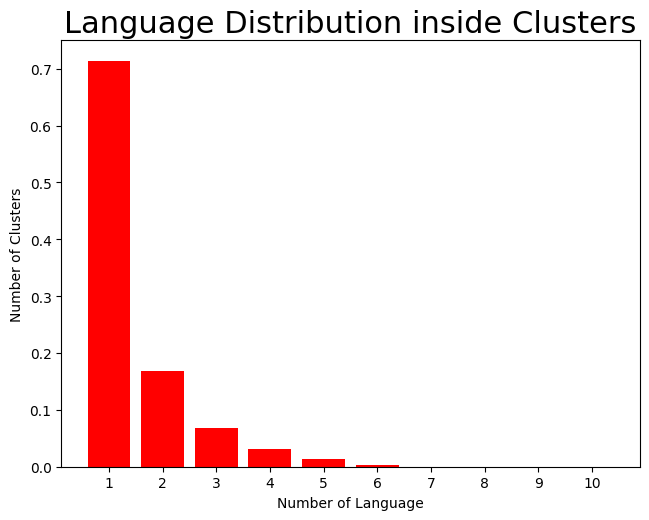

In [333]:
x = lst
indices = np.arange(len(x))
word, frequency = zip(*x)
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word)
#plt.xlim([0,8])
plt.tight_layout()
plt.gca().set(ylabel='Number of Clusters', xlabel='Number of Language')
plt.title('Language Distribution inside Clusters', fontdict=dict(size=22))
plt.show()

In [311]:
def Cluster_Language_distribution(df, file):
    
    size = df.groupby("cluster_id").size() #groups by cluster_id and returns the size of each group
    size = size[size > 1] #selects only groups with size more than 1

    lst_of_index = size.index.tolist()
    df_size = df[df['cluster_id'].isin(lst_of_index)]  # creates a dataframe with only indexes of groups with predefined size

    #Creates a list of numbers where each number represents the amount of different languages in a specific cluster
    lst = []
    for group in df_size.groupby("cluster_id"):
        freq = collections.defaultdict(int)
        #print(lst)
        #print(group)
        for x in group[1].lang.tolist():
            freq[x] += 1
        lst.append(len(freq))
    
    #Count occurences for every number (and normalize?!?)
    def get_tuple_count_list(_list):
        countedDict = Counter(_list)
        for key, value in countedDict.items():
            countedDict[key] = value/len(df_size.groupby("cluster_id"))
        return list(countedDict.items())
    lst = get_tuple_count_list(lst)
    lst.sort(key=lambda x: x[0])
    
    
    lst = fill_missing_values(lst)


    x = lst
    indices = np.arange(len(x))
    word, frequency = zip(*x)
    plt.bar(indices, frequency, color='r')
    plt.xticks(indices, word)
    plt.ylim([0,1])
    plt.title(file, fontdict=dict(size=5))
    return plt.tight_layout()
#    plt.gca().set(ylabel='Number of Clusters', xlabel='Number of Language')
#    plt.title('Language Distribution inside Clusters', fontdict=dict(size=22))


def fill_missing_values(lst):
    result = []
    current_number = 1

    for item in lst:
        while current_number < item[0]:
            result.append((current_number, 0))
            current_number += 1
        result.append(item)
        current_number += 1
    
    while current_number <= 10:
        result.append((current_number, 0))
        current_number += 1
        
    return result

Article Feed: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [02:01<00:00,  4.35s/it]


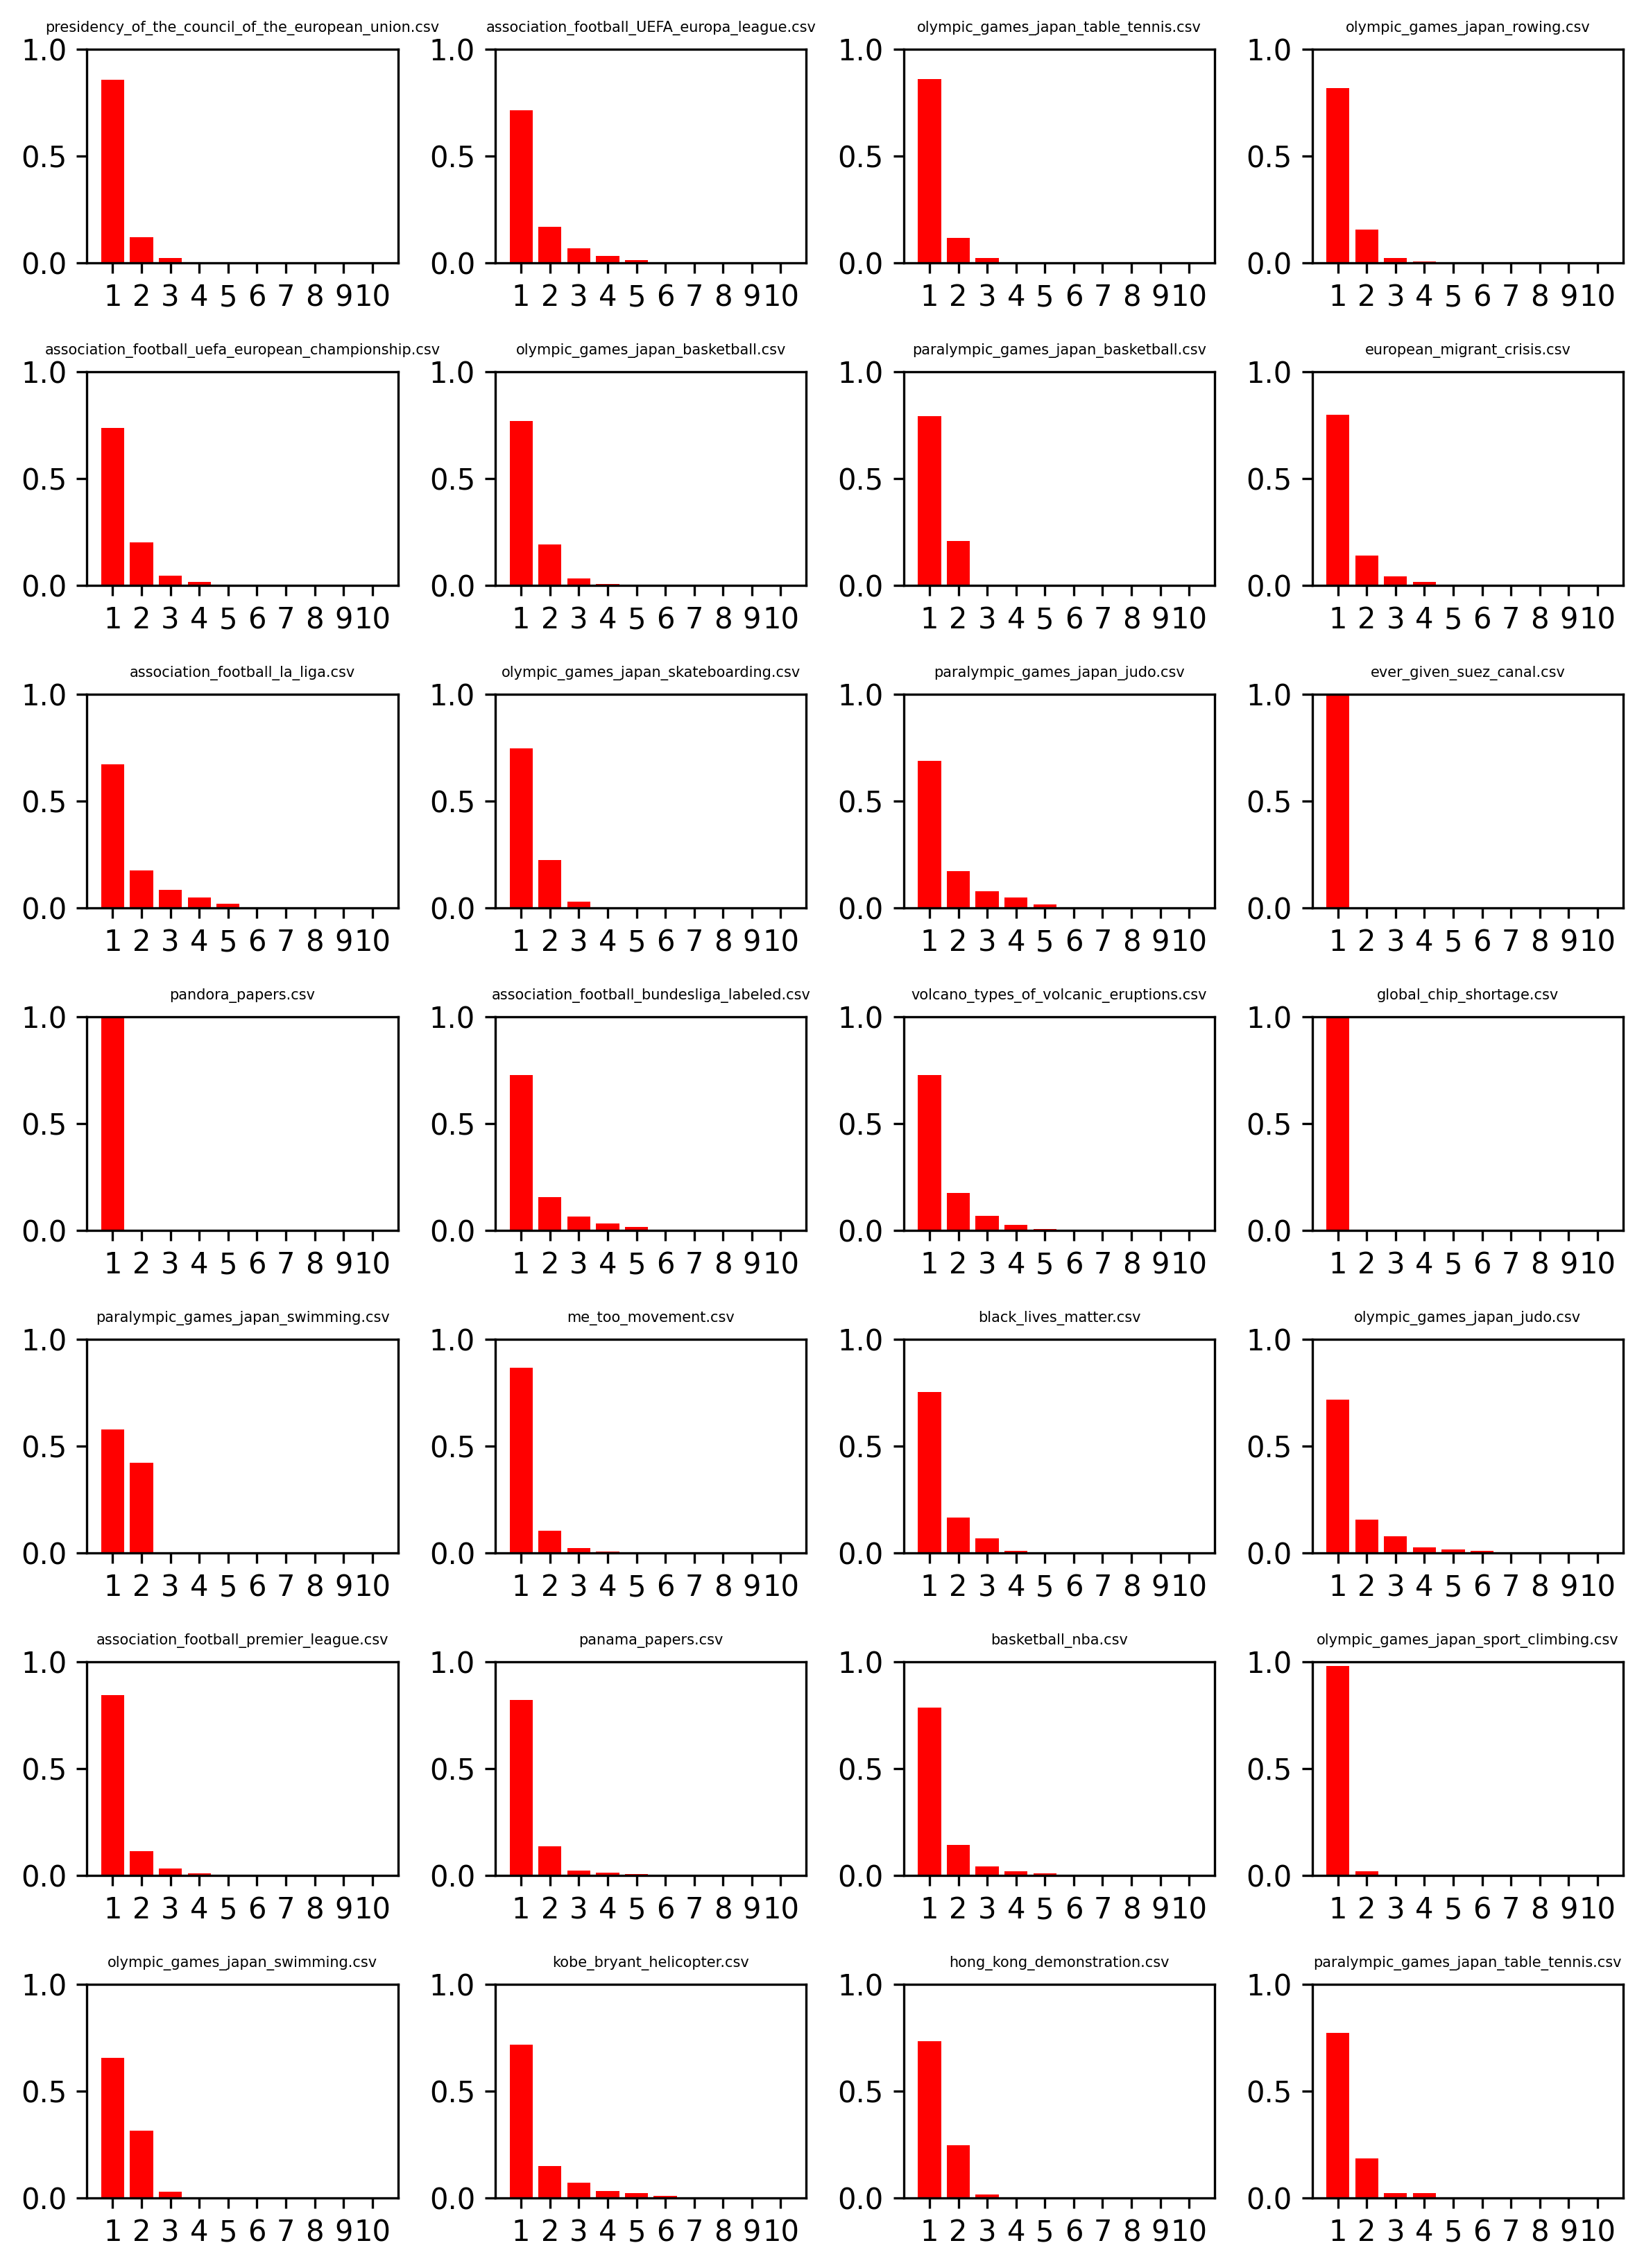

In [312]:
mypath = "../data/labeled"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


# Create a subplot grid with 7 rows and 4 columns
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(8, 11), dpi=300)
plt.subplots_adjust(hspace=0.5)
#print(axs.shape)

position=0
for file in tqdm(onlyfiles, desc="Article Feed"):
    #New concept file
    df = pd.read_csv(f"../data/labeled/{file}")
    #print(int(i/4), i%4)
    #Plot the barplot
    plt.sca(axs[int(position/4), position%4])
    Cluster_Language_distribution(df,file)
    position += 1


plt.savefig('28_barplots_clusters(language).png')
plt.show()